In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    if b == 0 and c == 0:
        return 0
    elif b == 0:
        return 1000000000
    else:
        return (b-c)**2/(b+c)

def SHD(cc, n):
    T = TDT(n)
    
    d = np.zeros(2)
    N = np.zeros(6)
    
    for k in range(6):
        N[k] = n[k]
    
    if T < cc:
        while T < cc:
            if N[4] > 0:
                N[4] -= 1
            elif N[1] > 0:
                N[1] -= 1
            elif N[2] > 0:
                N[2] -= 1
            elif N[5] > 0:
                N[5] -= 1
            else:
                N[0] -= 1
            N[3] += 1
            
            T = TDT(N)
            d[0] -= 1
        
        T = TDT(n)
        for k in range(6):
            N[k] = n[k]
        
        while T < cc:
            if N[3] > 0:
                N[3] -= 1
            elif N[0] > 0:
                N[0] -= 1
            elif N[2] > 0:
                N[2] -= 1
            elif N[5] > 0:
                N[5] -= 1
            else:
                N[1] -= 1
            N[4] += 1
            
            T = TDT(N)
            d[1] -= 1
        
        if d[0] > d[1]:
            return d[0]
        else:
            return d[1]
    
    else:
        step = 0
        
        if n[0] + 2*n[3] > n[1] + 2*n[4]:
            while T >= cc:
                if n[3] > 0:
                    n[3] -= 1
                elif n[0] > 0:
                    n[0] -= 1
                elif n[5] > 0:
                    n[5] -= 1
                elif n[2] > 0:
                    n[2] -= 1
                else:
                    n[1] -= 1
                n[4] += 1
            
                T = TDT(n)
                step += 1
        else:
            while T >= cc:
                if n[4] > 0:
                    n[4] -= 1
                elif n[1] > 0:
                    n[1] -= 1
                elif n[5] > 0:
                    n[5] -= 1
                elif n[2] > 0:
                    n[2] -= 1
                else:
                    n[0] -= 1
                n[3] += 1
            
                T = TDT(n)
                step += 1
        
        return step-1

In [3]:
cc = 3.84
N = [100, 29, 19, 288, 12,37]

print(TDT(N))
print(SHD(cc,N))

506.03520208604954
142


In [4]:
def appx_SHD(cc,n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    T = TDT(n)
    
    s = b + c
    d = math.fabs(b-c)
    
    if T >= cc:
        return math.ceil((d-math.sqrt(s*cc)) / 4) - 1
    
    else:
        if b + c < cc:
            return -math.ceil((2*cc - s - d)/4)
        else:
            return -math.ceil((math.sqrt(s*cc)-d)/4)

In [5]:
cc = 3.84
N = [100, 29, 19, 288, 12,37]

print(TDT(N))
print(appx_SHD(cc,N))

506.03520208604954
142


In [6]:
def random_num(pd):
    dist = np.cumsum(pd).tolist()
    dist[-1] = 1.0
    num = np.random.rand()
    dist.append(num)
    return sorted(dist).index(num)

def exp_mec(shd, m, K, epsilon):
    S = np.zeros(K)
    k = 0
    
    w = np.zeros(m)
    p = np.zeros(m)
    
    while k < K:
        sumw = 0
        for i in range(m):
            w[i] = math.exp(epsilon * shd[i] / (2*K))
            sumw += w[i]
        for i in range(m):
            p[i] = w[i]/sumw
            
        x = random_num(p)
        shd[x] = -1000000.0
        S[k] = x
        k += 1
    
    return S

In [7]:
shd = [-201,-200,-100,-5,-2,-1,3,98,99,100]

print(exp_mec(shd, 10, 3, 0.1))

[9. 7. 8.]


4995
4991
4993
4992
4998
4997
4999
4996
4990
217
-------
appx_SHD
4995
4991
4993
4992
4998
4997
4999
3394
3514
2126
-------
appx_output = [4991. 4993. 4995.]
appx_time = 0.021479129791259766 [sec]
-------
exact_SHD
4995
4991
4993
4992
4998
4997
1025
3514
2621
3474
-------
exact_output = [4991. 4995. 3580.]
exact_time = 1.0556080341339111 [sec]


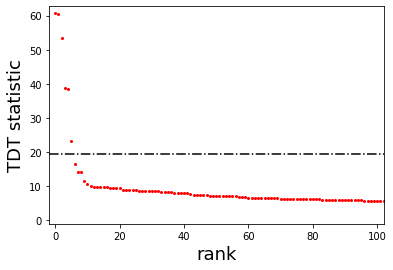

In [8]:
# b, cを与える (n0=b, n1=cとする, n5 = 2N-b-c)
N = 150
M = 5000
S = np.zeros(M)
b = np.zeros(M)
c = np.zeros(M)

n = np.zeros((M,6))

for i in range(M-10):
    S[i] = random.randint(0,2*N)
    b[i] = np.random.binomial(S[i],0.5)
    c[i] = S[i] - b[i]
    n[i][0] = b[i]
    n[i][1] = c[i]
    n[i][5] = 2*N - b[i] - c[i]

for i in range(M-10, M):
    S[i] = random.randint(0,2*N)
    b[i] = np.random.binomial(S[i],0.75)
    c[i] = S[i] - b[i]
    n[i][0] = b[i]
    n[i][1] = c[i]
    n[i][5] = 2*N - b[i] - c[i]
    
stats = np.zeros(M)
order = np.zeros(M)

for i in range(M):
    order[i] = i
    if b[i] == 0 and c[i] == 0:
        stats[i] = 0
    else:
        stats[i] = (b[i]-c[i])**2/(b[i]+c[i])

x = np.argsort(stats)
for i in range(10):
    print(x[M-1-i])

sorted_stats = sorted(stats, reverse=True)
#print(sorted_stats)

fig = plt.figure()
plt.ylim(-1, max(stats)+2)
plt.xlim(-2, 102)
plt.plot(order, sorted_stats, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(19.5, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("stats1_small.png")
fig.savefig("fig/stats1_small.eps")

shd = np.zeros(M)
appx_shd = np.zeros(M)
cc = 19.5

appx_start = time.time()
for i in range(M):
    k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
    appx_shd[i] = appx_SHD(cc,k)
appx_end = time.time()

#print(shd)
#print(appx_shd)

y = np.argsort(appx_shd)
print("-------")
print("appx_SHD")
for i in range(10):
    print(y[M-1-i])
print("-------")

print("appx_output =",exp_mec(appx_shd,M,3,3))
print("appx_time =",appx_end-appx_start,"[sec]")

exact_start = time.time()
for i in range(M):
    k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
    shd[i] = SHD(cc,k)
exact_end = time.time()
    
z = np.argsort(shd)
print("-------")
print("exact_SHD")
for i in range(10):
    print(z[M-1-i])
print("-------")

print("exact_output =",exp_mec(shd,M,3,3))
print("exact_time =",exact_end-exact_start,"[sec]")

999991
999999
999994
999998
999995
999992
999997
999996
999993
51580


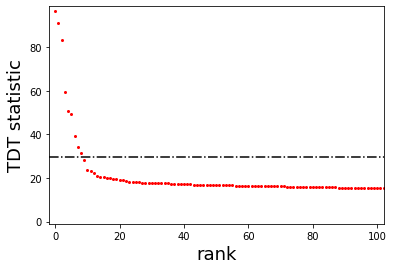

In [9]:
# b, cを与える (n0=b, n1=cとする, n5 = 2N-b-c)
N = 5000
M = 1000000
S = np.zeros(M)
b = np.zeros(M)
c = np.zeros(M)

n = np.zeros((M,6))

for i in range(M-10):
    S[i] = random.randint(0,2*N)
    b[i] = np.random.binomial(S[i],0.5)
    c[i] = S[i] - b[i]
    n[i][0] = b[i]
    n[i][1] = c[i]
    n[i][5] = 2*N - b[i] - c[i]

for i in range(M-10, M):
    S[i] = random.randint(0,2*N)
    b[i] = np.random.binomial(S[i],0.55)
    c[i] = S[i] - b[i]
    n[i][0] = b[i]
    n[i][1] = c[i]
    n[i][5] = 2*N - b[i] - c[i]
    
stats = np.zeros(M)
order = np.zeros(M)

for i in range(M):
    order[i] = i
    if b[i] == 0 and c[i] == 0:
        stats[i] = 0
    else:
        stats[i] = (b[i]-c[i])**2/(b[i]+c[i])

x = np.argsort(stats)
for i in range(10):
    print(x[M-1-i])

sorted_stats = sorted(stats, reverse=True)
#print(sorted_stats)

fig = plt.figure()
plt.ylim(-1, max(stats)+2)
plt.xlim(-2, 102)
plt.plot(order, sorted_stats, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(29.7, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("stats1_large.png")
fig.savefig("fig/stats1_large.eps")

In [10]:
def generate_n_small(N, M):
    S = np.zeros(M)
    b = np.zeros(M)
    c = np.zeros(M)
    n = np.zeros((M,6))
    
    for i in range(M-10):
        S[i] = 2*N
        n[i][0] = np.random.binomial(S[i],1/6)
        n[i][1] = np.random.binomial((S[i]-n[i][0]), 1/5)
        n[i][2] = np.random.binomial((S[i]-n[i][0]-n[i][1]), 1/4)
        n[i][3] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]), 1/3)
        n[i][4] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]), 1/2)
        n[i][5] = S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]-n[i][4]
    
    for i in range(M-10,M):
        S[i] = 2*N
        n[i][0] = np.random.binomial(S[i],1/4)
        n[i][1] = np.random.binomial((S[i]-n[i][0]), 1/8)
        n[i][2] = np.random.binomial((S[i]-n[i][0]-n[i][1]), 1/4)
        n[i][3] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]),1/2)
        n[i][4] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]), 1/3)
        n[i][5] = S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]-n[i][4]
    
    return n

def generate_n_large(N, M):
    S = np.zeros(M)
    b = np.zeros(M)
    c = np.zeros(M)
    n = np.zeros((M,6))
    
    for i in range(M-10):
        S[i] = 2*N
        n[i][0] = np.random.binomial(S[i],1/6)
        n[i][1] = np.random.binomial((S[i]-n[i][0]), 1/5)
        n[i][2] = np.random.binomial((S[i]-n[i][0]-n[i][1]), 1/4)
        n[i][3] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]), 1/3)
        n[i][4] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]), 1/2)
        n[i][5] = S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]-n[i][4]
    
    for i in range(M-10,M):
        S[i] = 2*N
        n[i][0] = np.random.binomial(S[i],11/60)
        n[i][1] = np.random.binomial((S[i]-n[i][0]), 2/11)
        n[i][2] = np.random.binomial((S[i]-n[i][0]-n[i][1]), 1/4)
        n[i][3] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]), 11/30)
        n[i][4] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]), 5/11)
        n[i][5] = S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]-n[i][4]
    
    return n

4991
4996
4998
4993
4995
4992
4999
4994
4990
4997


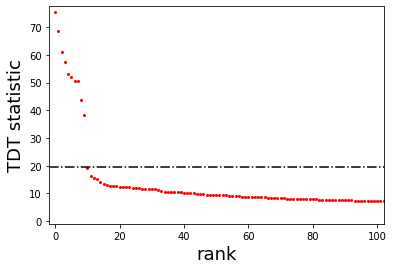

In [11]:
# n0~n5を与える
# N = 150,M = 5000, 時間計測

N = 150
M = 5000
b = np.zeros(M)
c = np.zeros(M)

n = np.zeros((M,6))

n = generate_n_small(N,M)

for i in range(M):
    b[i] = n[i][0] + n[i][2] + 2*n[i][3]
    c[i] = n[i][1] + n[i][2] + 2*n[i][4]
    
stats = np.zeros(M)
order = np.zeros(M)

for i in range(M):
    order[i] = i
    if b[i] == 0 and c[i] == 0:
        stats[i] = 0
    else:
        stats[i] = (b[i]-c[i])**2/(b[i]+c[i])

x = np.argsort(stats)
for i in range(10):
    print(x[M-1-i])

sorted_stats = sorted(stats, reverse=True)
#print(sorted_stats)

fig = plt.figure()
plt.ylim(-1, max(stats)+2)
plt.xlim(-2, 102)
plt.plot(order, sorted_stats, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(19.5, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("stats2_small.png")
fig.savefig("fig/stats2_small.eps")

999999
999998
999993
999994
999991
999995
999992
999997
999996
999990


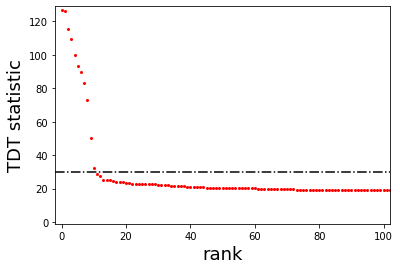

In [12]:
# n0~n5を与える
# N = 5000,M = 1000000, 時間計測

N = 5000
M = 1000000
S = np.zeros(M)
b = np.zeros(M)
c = np.zeros(M)

n = np.zeros((M,6))

n = generate_n_large(N,M)

for i in range(M):
    b[i] = n[i][0] + n[i][2] + 2*n[i][3]
    c[i] = n[i][1] + n[i][2] + 2*n[i][4]
    
stats = np.zeros(M)
order = np.zeros(M)

for i in range(M):
    order[i] = i
    if b[i] == 0 and c[i] == 0:
        stats[i] = 0
    else:
        stats[i] = (b[i]-c[i])**2/(b[i]+c[i])

x = np.argsort(stats)
for i in range(10):
    print(x[M-1-i])

sorted_stats = sorted(stats, reverse=True)
#print(sorted_stats)

fig = plt.figure()
plt.ylim(-1, max(stats)+2)
plt.xlim(-2, 102)
plt.plot(order, sorted_stats, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(29.7, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("stats2_large.png")
fig.savefig("fig/stats2_large.eps")